<a href="https://colab.research.google.com/github/erick-huang15/Python_Exercises/blob/main/Ensemble_Tree_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/CD:Week6: Regression Models/Boston_Housing_from_Sklearn.csv'
data = pd.read_csv(path)
data.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [5]:
X = data.drop(columns='PRICE')
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [6]:
pipeline = make_pipeline(StandardScaler(),LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [19]:
bagreg = BaggingRegressor(random_state=42)

In [20]:
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [21]:
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [22]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_test_score)
print(bagreg_train_score)

0.8204208271364619
0.9606756023782893


In [47]:
max_depth_range = list(range(2,36))

r2=[]
for n in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth = n, random_state = 42)
  dec_tree.fit(X_train, y_train)
  score = dec_tree.score(X_test, y_test)
  r2.append(score)

Text(0, 0.5, 'r2')

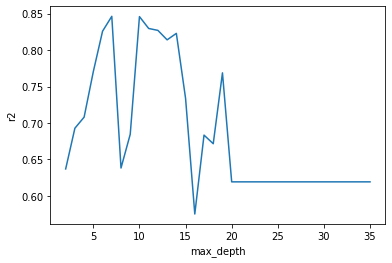

In [49]:
plt.plot(max_depth_range, r2)
plt.plot()
plt.xlabel('max_depth')
plt.ylabel('r2')

In [50]:
dec_tree_11 = DecisionTreeRegressor(max_depth=11, random_state=42)
dec_tree_11.fit(X_train, y_train)
train_11_score = dec_tree_11.score(X_train, y_train)
test_11_score = dec_tree_11.score(X_test, y_test)
print(train_11_score)
print(test_11_score)

0.9910995900493501
0.8297363137769441


In [23]:
rf = RandomForestRegressor(random_state=42)

In [24]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [25]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258


In [56]:
max_depth_range2 = list(range(2,36))

r2=[]
for n in max_depth_range2:
  rand_tree = RandomForestRegressor(max_depth = n, random_state = 42)
  rand_tree.fit(X_train, y_train)
  score = rand_tree.score(X_test, y_test)
  r2.append(score)

Text(0, 0.5, 'r2')

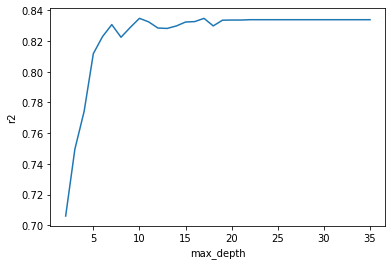

In [57]:
plt.plot(max_depth_range2, r2)
plt.plot()
plt.xlabel('max_depth')
plt.ylabel('r2')

In [59]:
rand_tree_11 = RandomForestRegressor(max_depth=10, random_state=42)
rand_tree_11.fit(X_train, y_train)
train_11_score = rand_tree_11.score(X_train, y_train)
test_11_score = rand_tree_11.score(X_test, y_test)
print(train_11_score)
print(test_11_score)

0.9739265386241982
0.834746736666161
